In [1]:
#数据预处理后做可视化分析

#预处理后的新文件名称
#userdata.csv

#列名称	说明
#User_Id      用户名 
#Sku_Id       商品序号
#Category_Id  商品类目序号
#Type         用户行为类型包括('pv', 'buy', 'cart', 'fav')
#Timestamp    年月日小时分钟秒
#Date         年月日
#Hour         小时 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('ggplot')  # 更改绘图风格 R语言绘图库的风格
plt.rcParams['font.family']='SimHei'
plt.rcParams['axes.unicode_minus']= False

In [3]:
userdata=pd.read_csv('userdata.csv')

In [4]:
userdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7889263 entries, 0 to 7889262
Data columns (total 8 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   Unnamed: 0   int64 
 1   User_Id      int64 
 2   Sku_Id       int64 
 3   Category_Id  int64 
 4   Type         object
 5   Timestamp    object
 6   Date         object
 7   Time         object
dtypes: int64(4), object(4)
memory usage: 481.5+ MB


In [5]:
# 总访问量
pv = userdata[userdata['Type'] == 'pv']['User_Id'].count()
print('总访问量为 %i' %pv)
# 总访客数
uv = userdata['User_Id'].nunique()
print('总访客数为 %i' %uv)

总访问量为 7064791
总访客数为 933816


In [6]:
# 日均访问量
pv_per_day = pv / userdata['Date'].nunique()
print('日均访问量为 %.3f' %pv_per_day)
# 人均访问量
pv_per_user = pv / uv
print('人均访问量为 %.3f' %pv_per_user)

日均访问量为 1009255.857
人均访问量为 7.566


In [7]:
# 消费用户数
user_buy = userdata[userdata['Type'] == 'buy']['User_Id'].unique()
print('消费用户数为 %i' %len(user_buy))
# 消费用户数占比
user_buy_rate = len(user_buy) / uv
print('消费用户数占比为 %.3f%%' %(user_buy_rate * 100))
# 消费用户访问量
pv_buy = userdata[userdata['User_Id'].isin(user_buy)]['Type'].value_counts().pv
print('消费用户访问量为 %i' %pv_buy)
# 消费用户访问量占比
pv_pay_rate = pv_buy / pv
print('消费用户访问量占比为 %.3f%%' %(pv_pay_rate * 100))
# 消费用户人均访问量
pv_per_buy_user = pv_buy / len(user_buy)
print('消费用户人均访问量为 %.3f' %pv_per_buy_user)

消费用户数为 135585
消费用户数占比为 14.519%
消费用户访问量为 1219364
消费用户访问量占比为 17.260%
消费用户人均访问量为 8.993


In [8]:
# 单个用户消费总次数
total_buy_count = (userdata[userdata['Type']=='buy'].groupby(['User_Id'])['Type'].count().to_frame().rename(columns={'Type':'total'}))
# 复购率
re_buy_rate = total_buy_count[total_buy_count>=2].count()/total_buy_count.count()
print('复购率为 %.3f%%' %(re_buy_rate * 100))

复购率为 14.638%


In [9]:
total_buy_count.head()

,total
User_Id,
2,1
4,2
16,1
20,1
41,3


In [10]:
total_buy_count.describe()

,total
count,135585.000000
mean,1.181370
std,0.501877
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,23.000000


Text(0, 0.5, 'Number of Users')

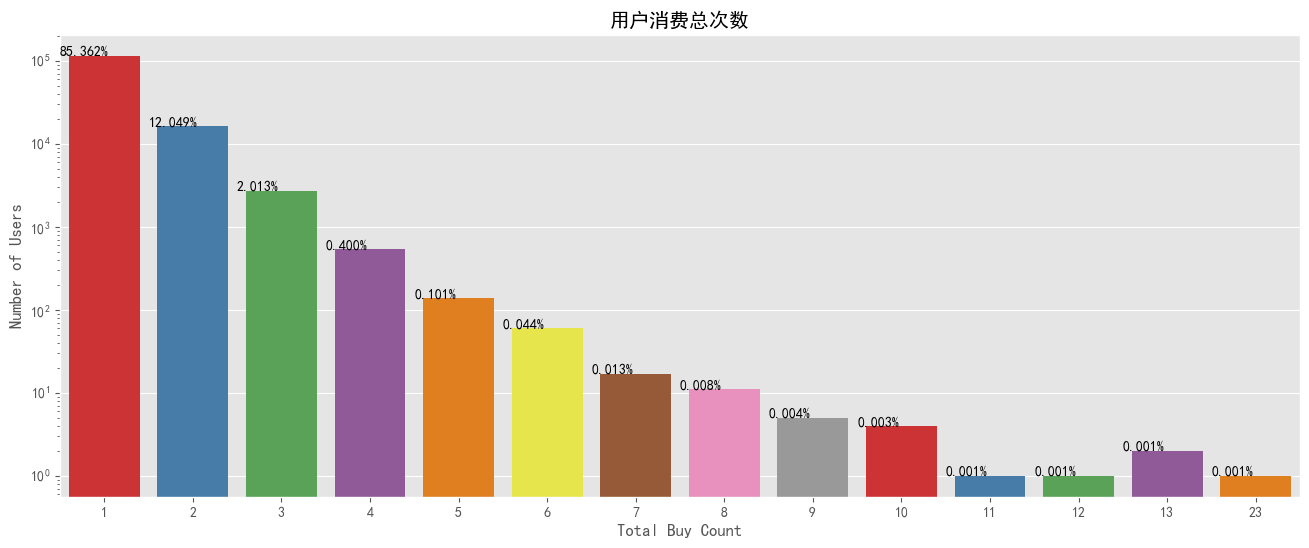

In [11]:
# 绘制散点分布图
tbc_box = total_buy_count.reset_index()
fig, ax = plt.subplots(figsize=[16,6])
ax.set_yscale("log")
sns.countplot(x=tbc_box['total'],data=tbc_box,palette='Set1')
for p in ax.patches:
        ax.annotate('{:.3f}%'.format(100*p.get_height()/len(tbc_box['total'])), (p.get_x() - 0.1, p.get_height()))
plt.title('用户消费总次数')
plt.xlabel('Total Buy Count')
plt.ylabel('Number of Users')

In [12]:
# 消费次数前10客户
topbuyer10 = total_buy_count.sort_values(by='total',ascending=False)[:10]

In [13]:
topbuyer10.reset_index().style.bar(color='skyblue',subset=['total'])

,User_Id,total
0,866670,23
1,107013,13
2,702034,13
3,78030,12
4,432739,11
5,537150,10
6,1014116,10
7,834051,10
8,960681,10
9,978886,9


In [14]:
#消费次数为1的用户占比极大，可适当增加推广，完善购物体验，提高用户消费次数。同时提高对高消费次数的用户对商品的满意度，增大留存率及复购率

In [15]:
#每日浏览量
pv_daily = userdata[userdata['Type'] == 'pv'].groupby('Date')['User_Id'].count()
#每日购买量
buy_daily = userdata[userdata['Type'] == 'buy'].groupby('Date')['User_Id'].count()

Text(0.5, 1.0, '每日购买量')

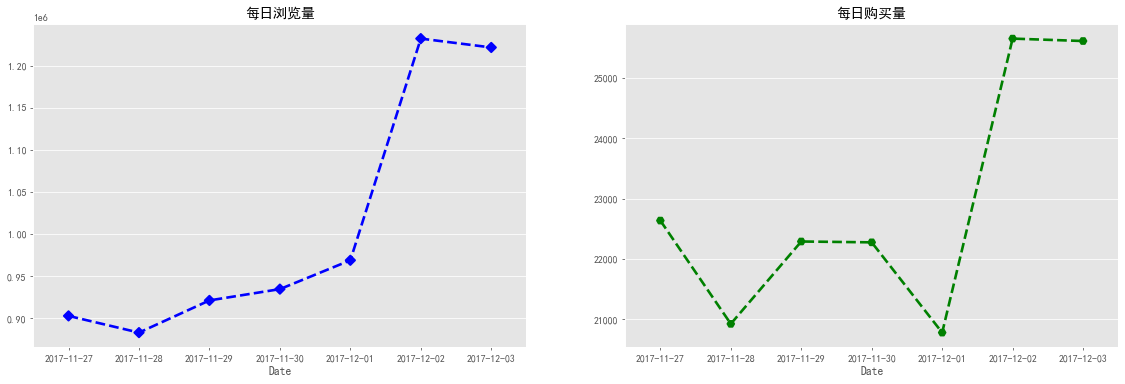

In [16]:
plt.figure(figsize=(20,6),dpi =70)
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

# 每日浏览量
plt.sca(ax1)
sns.pointplot(pv_daily.index, pv_daily.values, markers='D', linestyles='--',color='blue')
x=list(range(0,16))
plt.title('每日浏览量')

# 每日购买量
plt.sca(ax2)
sns.pointplot(buy_daily.index, buy_daily.values, markers='H', linestyles='--',color='green')
x=list(range(0,16))
plt.title('每日购买量')

In [17]:
#到周末，波动大，应为节假日营销活动或推广拉新活动带来的影响

In [18]:
userdata['Hour'] = pd.to_datetime(userdata['Time']).dt.hour # 小时

In [19]:
#每时浏览量
pv_hourly = userdata[userdata['Type'] == 'pv'].groupby('Hour')['User_Id'].count()
#每时购买量
uv_hourly = userdata[userdata['Type'] == 'buy'].groupby('Hour')['User_Id'].count()

Text(0.5, 1.0, '每时购买量')

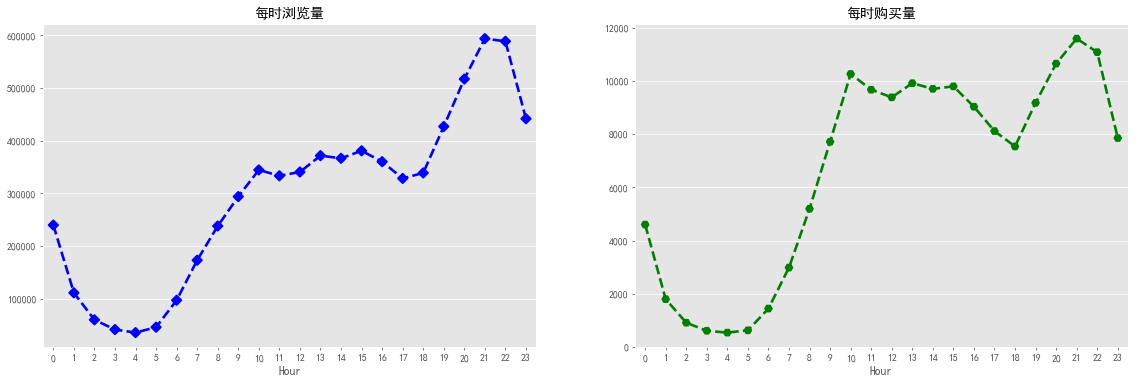

In [20]:
plt.figure(figsize=(20,6),dpi =70)
ax3 = plt.subplot(1,2,1)
ax4 = plt.subplot(1,2,2)

# 每时浏览量
plt.sca(ax3)
sns.pointplot(pv_hourly.index, pv_hourly.values, markers='D', linestyles='--',color='blue')
plt.title('每时浏览量')

# 每时购买量
plt.sca(ax4)
sns.pointplot(uv_hourly.index, uv_hourly.values, markers='H', linestyles='--',color='green')
plt.title('每时购买量')

In [22]:
#浏览数与购买量曲线基本保持一致。20-22间为最高峰。1-6为低峰，可用作维护时间。需要注意的是购买曲线在中午时偏高，而浏览量中等，说明该时段的整体转化情况最佳。
#可以把握9点及20点两个关键时间点，增大商品的推广力度，加大营销收入，取得更好的收益。

In [24]:
#漏斗转化模型

In [28]:
#行为分布
userdata2=userdata['Type'].value_counts()
userdata2

pv      7064791
cart     437025
fav      227271
buy      160176
Name: Type, dtype: int64

In [29]:
Type_num = {'Type':userdata2.index,'Num':userdata2.values}
userdata2 = pd.DataFrame(Type_num)
userdata2.loc[1,"Type"]="cart+fav"
userdata2.loc[1,"Num"]+=userdata2.loc[2,"Num"]

userdata2=userdata2.loc[[0,1,3],:]
userdata2

,Type,Num
0,pv,7064791
1,cart+fav,664296
3,buy,160176


In [30]:
temp1 = np.array(userdata2['Num'][1:])
temp2 = np.array(userdata2['Num'][0:-1])
single_convs = temp1 / temp2
single_convs = list(single_convs)
single_convs.insert(0,1)
single_convs = [round(x,4) for x in single_convs] 
userdata2['单一环节转化率'] = single_convs

temp3 = np.array(userdata2['Num'])
temp4= np.ones(len(userdata2['Num'])) * userdata2['Num'][0]
total_convs = (temp3 / temp4).tolist()
total_convs = [round(x,4) for x in total_convs]
userdata2['总体转化率'] = total_convs

userdata2

,Type,Num,单一环节转化率,总体转化率
0,pv,7064791,1.0000,1.0000
1,cart+fav,664296,0.0940,0.0940
3,buy,160176,0.2411,0.0227


In [ ]:
#from pyecharts import Funnel   
#没找到pyecharts module,后补一个漏斗图